In [1]:
# Analysis and Mathematical  Libraries
import numpy as np

import pandas as pd

# Visualizations Libraries

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# DateTime Libraries
import time, datetime

# Escape Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("uber.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.columns = df.columns.str.replace("*","")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df.shape

(1156, 7)

In [6]:
print("There are {} rows and {} columns are present in the Data Set".format(df.shape[0],df.shape[1]))

There are 1156 rows and 7 columns are present in the Data Set


In [7]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

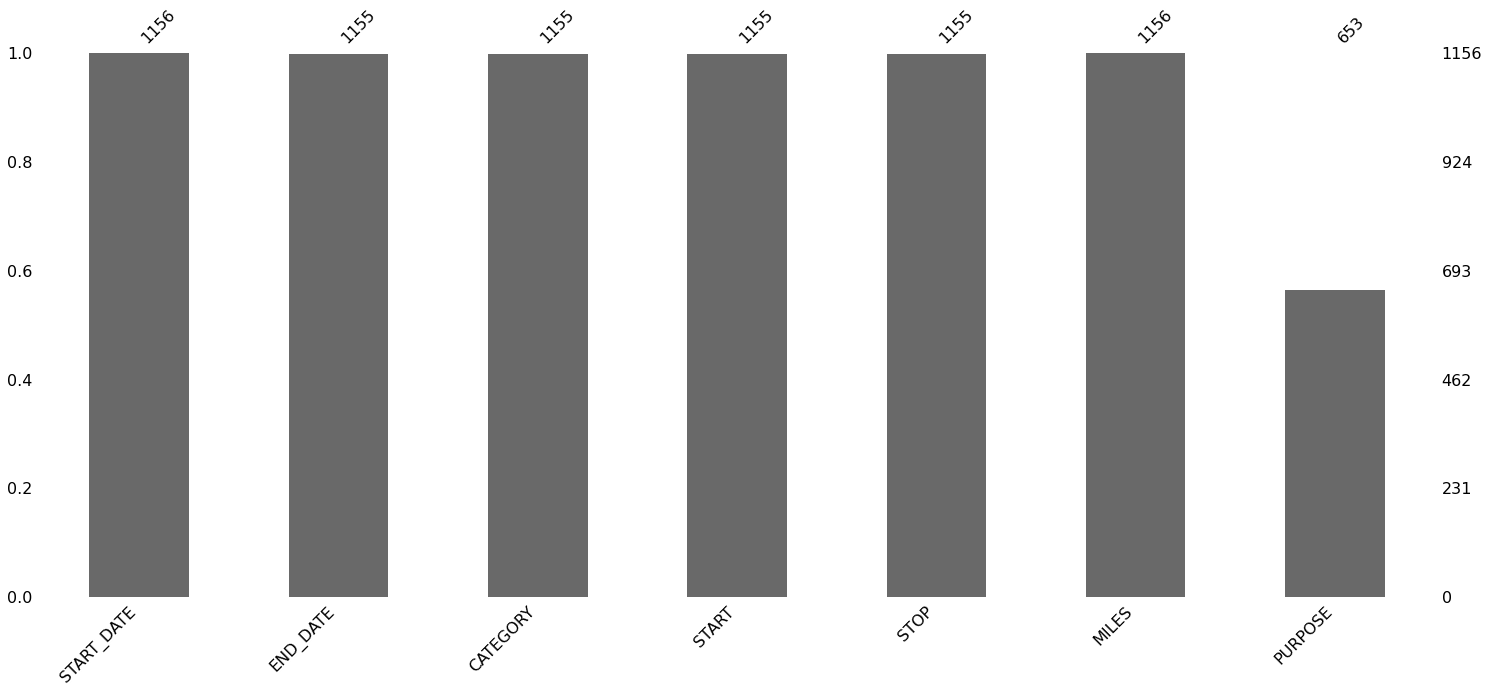

In [11]:
#visualizing the null values for each attribute


import missingno as msno

msno.bar(df)
plt.show()

In [9]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [10]:
df.drop(index = 1155,axis=0, inplace = True)

In [13]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

PURPOSE    502
dtype: int64

In [14]:
a=df["PURPOSE"].isnull().sum()/len(df)
print(a*100)
#Here we can see that 43% of null values present in the dataset in PURPOSE COLUMN


43.46320346320346


In [15]:
# filling a null values using fillna() 
#ffill means forwadrd fill   (  non-null values forward)
df["PURPOSE"].fillna(method='ffill', inplace = True) 

In [16]:
df.isnull().sum()


START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [17]:
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();


# Now time object type changes to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [18]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [19]:
#Since the Date and Time of the start_date and end_date are of data type object we are converting it to datetime
df['START_DATE']= pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']= pd.to_datetime(df['END_DATE'],errors='coerce')
df.info();


# Now time object type changes to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [20]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


col_0,Count of travels as per category
CATEGORY,
Business,1078
Personal,77


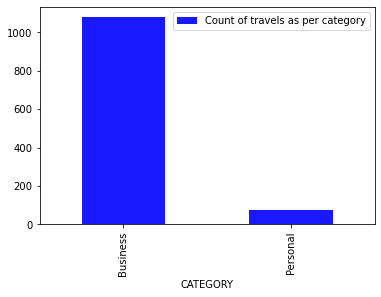

In [24]:

Category =pd.crosstab(index=df['CATEGORY'],columns='Count of travels as per category')

Category.plot(kind='bar',color='b',alpha=0.9)
plt.legend()
Category


Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Apex                 17
Westpark Place       17
Berkeley             16
Midtown              14
Kenner               11
R?walpindi           11
Kissimmee            11
Name: START, dtype: int64


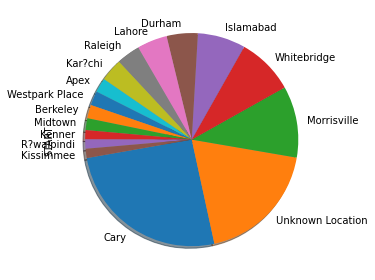

In [23]:
#Which are the places have HIGHEST START points
Start_point = df.START.value_counts()
Start_point
print(Start_point[Start_point > 10])


Start_point[Start_point > 10].plot(kind = "pie", shadow=True, startangle=190)
plt.tight_layout()
plt.show()


In [63]:
#start_pont are low number of starting points
Start_point = df.START.value_counts()
Start_point
Start_point[Start_point <=  10]

Emeryville                    10
New Orleans                   10
Downtown                       9
Central                        8
San Francisco                  8
                              ..
Townes at Everett Crossing     1
Jackson Heights                1
Tenderloin                     1
College Avenue                 1
Mcvan                          1
Name: START, Length: 161, dtype: int64

In [25]:
#Which are the places are having HIGHEST STOP point
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point >=  10]

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Edgehill Farms       10
Kenner               10
New Orleans          10
Name: STOP, dtype: int64

In [26]:
#Which are the places are having LOWEST STOP point
Stop_point = df.STOP.value_counts()
Stop_point
Stop_point[Stop_point <=  10]

Edgehill Farms        10
Kenner                10
New Orleans           10
Emeryville             9
Central                9
                      ..
Southwest Berkeley     1
San Jose               1
Sky Lake               1
Bywater                1
Chapel Hill            1
Name: STOP, Length: 173, dtype: int64

9.9     28
3.1     26
3.0     19
2.1     19
2.5     19
10.4    19
1.8     18
2.2     18
1.7     18
3.3     16
2.0     16
2.8     16
1.9     16
3.8     15
6.1     15
5.5     14
1.4     14
7.9     13
1.6     13
6.2     12
2.9     12
2.7     12
5.7     12
2.3     12
1.5     12
6.0     11
1.0     11
7.7     11
5.1     11
4.9     11
Name: MILES, dtype: int64


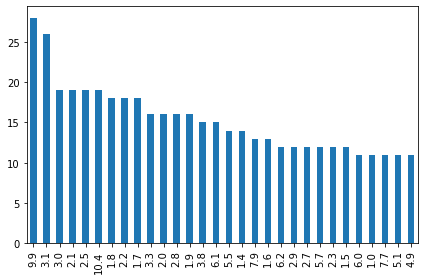

In [27]:
#miles value
Miles = df.MILES.value_counts()
Miles
print(Miles[Miles> 10])
Miles[Miles> 10].plot(kind = "bar")
plt.tight_layout()
plt.show()


col_0,Count of Miles
MILES,
False,840
True,315


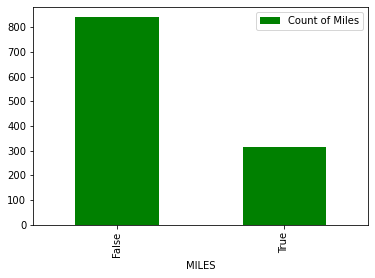

In [67]:
Miles =pd.crosstab(index=df["MILES"]>10,columns='Count of Miles')
Miles.plot(kind='bar',color='g')
plt.legend()
Miles


In [29]:
#Greater than 10 miles
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


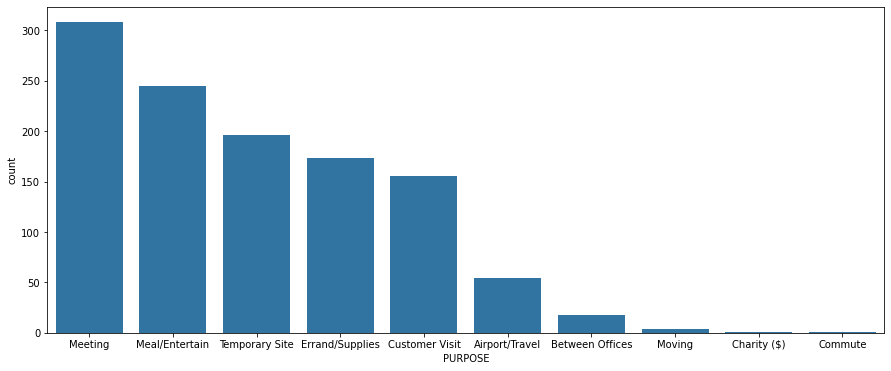

In [23]:
#Purpose of most cab rides
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'], order=df['PURPOSE'].value_counts().index, color=sns.color_palette()[0])
plt.show()

In [31]:
# For future Analysis


# calculation of the duration, as there might be some relation of it to PURPOSE of Cab ride.
df['MINUTES'] = df.END_DATE - df.START_DATE
df.head(3)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00


In [27]:
# As Duration is in datetime format, we need to convert it to float type in order to use it for analysis.
df['MINUTES'] = df['MINUTES'].dt.total_seconds() /60
df.head()

KeyError: 'MINUTES'

**Grouping Purpose by Miles to see if we can get any pattern.**

In [26]:
#Grouping Purpose by Mile to find pattern
pd.DataFrame({'MEAN': df.groupby(['PURPOSE'])['MILES'].mean().round(1)}).reset_index()
#Commute has the maximum mean value followed by Customer visit


,PURPOSE,MEAN
0,Airport/Travel,15.0
1,Between Offices,10.9
2,Charity ($),15.1
3,Commute,180.2
4,Customer Visit,16.1
5,Errand/Supplies,5.9
6,Meal/Entertain,5.8
7,Meeting,12.7
8,Moving,4.6
9,Temporary Site,11.0


AttributeError: 'DataFrame' object has no attribute 'MINUTES'

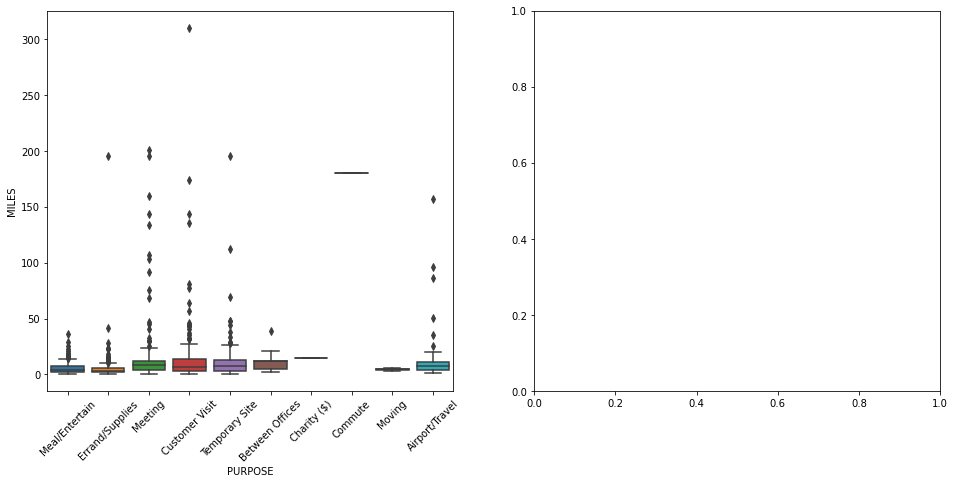

In [25]:
#BOX plot of MILES and MINUTES split by PURPOSE with outliers
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES)
plt.xticks(rotation=45);

AttributeError: 'DataFrame' object has no attribute 'MINUTES'

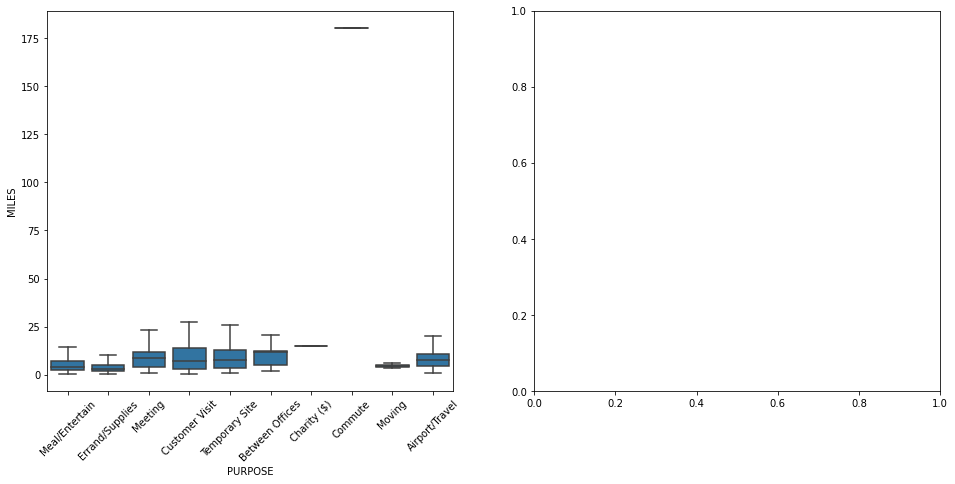

In [24]:
#BOX plot of MILES and MINUTES split by PURPOSE without outliers
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES,showfliers=False,color=sns.color_palette()[0])
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES,showfliers=False)
plt.xticks(rotation=45);

In [16]:
#Entering Month Name and evaluating Frequency of Trip in each Month
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

df['MONTH'] = df['MONTH'].map(dic)

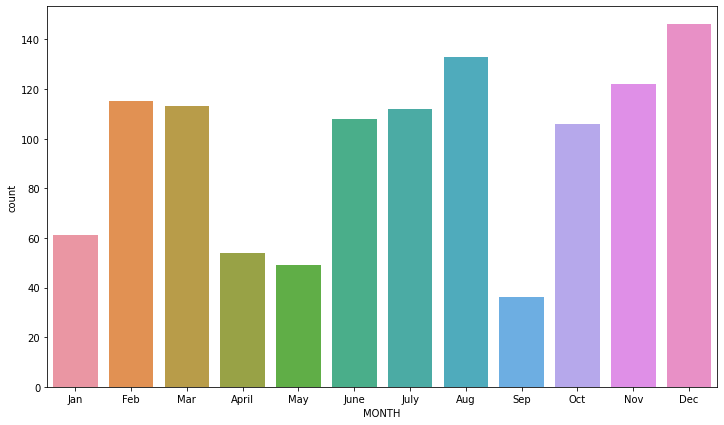

In [20]:
#When are cab rides more popular (frequently used)?

plt.figure(figsize=(12,7))
sns.countplot(df['MONTH'])
plt.show()

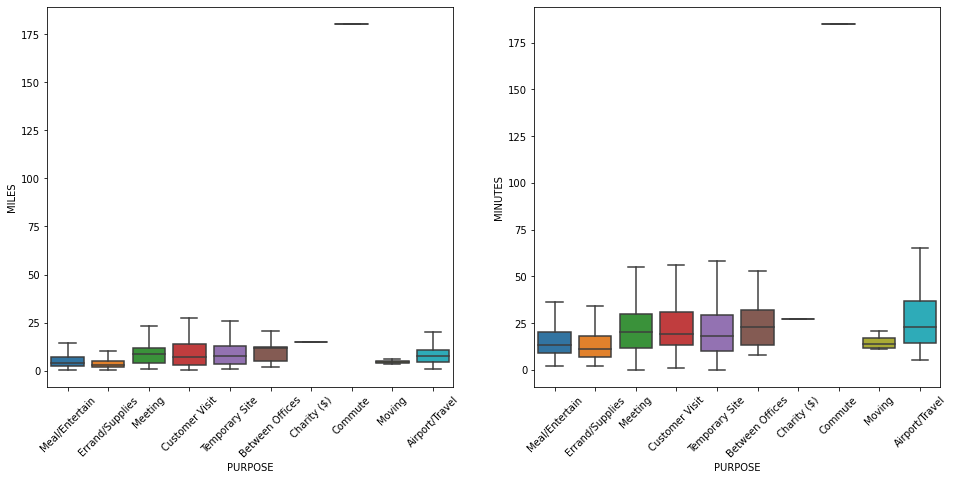

In [41]:
# the PURPOSE of Cab ride varying with time and distance
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MILES, showfliers = False)
plt.xticks(rotation = 45)
plt.subplot(1,2,2)
sns.boxplot(data=df, x=df.PURPOSE, y=df.MINUTES, showfliers = False)
plt.xticks(rotation = 45);

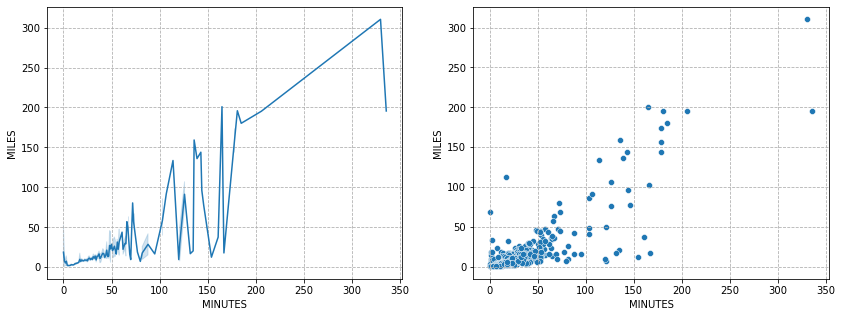

In [42]:
#Plots of MILES with respect to MINUTES
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
sns.lineplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")
plt.subplot(1,2,2)
sns.scatterplot(data=df, x=df.MINUTES, y=df.MILES)
plt.grid(True, linestyle = "--")
#we see that our conventional logic, that distance is proportional to time, is challenged as some cab rides took more time for less distance

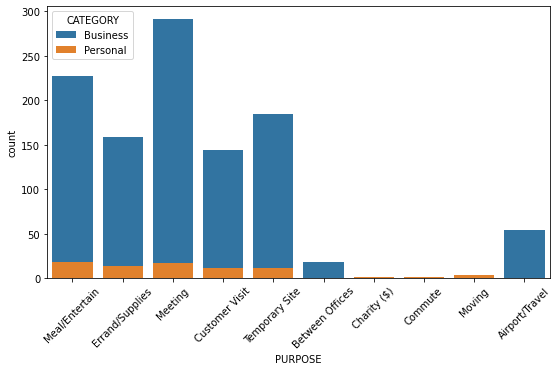

In [44]:
#Distribution of Cab rides based on Category
plt.figure(figsize = (9,5))
sns.countplot(data=df,x="PURPOSE", hue = 'CATEGORY', dodge = False)
plt.xticks(rotation = 45);

#The above plot makes clear distinction on the Purpose of Business rides and Personal rides.

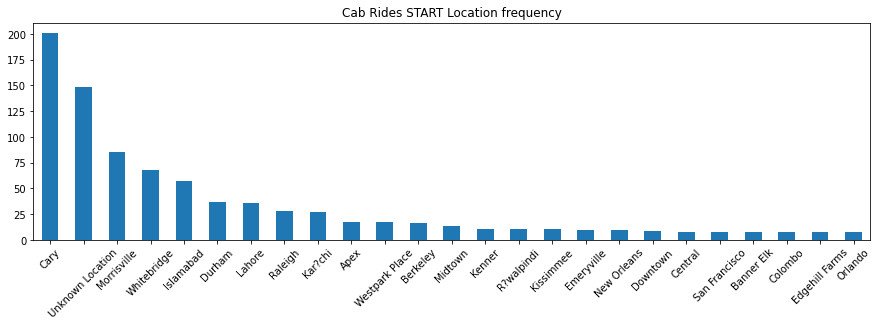

In [45]:
#Where do customers most frequently take cabs?
plt.figure(figsize = (15,4))
pd.Series(df['START']).value_counts()[:25].plot(kind="bar")
plt.title("Cab Rides START Location frequency")
plt.xticks(rotation = 45);

In [ ]:
#Calculating the round trips(start=stop)
plt.figure(figsize=(8,5))
def round(x):
    if x['START'] == x['STOP']:
        return 'YES'
    else:
        return 'NO'
    
df['ROUND_TRIP'] = df.apply(round, axis=1)

sns.countplot(df['ROUND_TRIP'], order=df['ROUND_TRIP'].value_counts().index, palette='rocket_r')
plt.show()

In [ ]:
print('Total trips: ', df['ROUND_TRIP'].count())
print(df['ROUND_TRIP'].year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='pastel');
